In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygam
import warnings
warnings.filterwarnings('ignore')
import lec2_graphs as afx
import missingno as msgn

plt.rcParams['figure.figsize']=(14,8)
plt.style.use('seaborn')

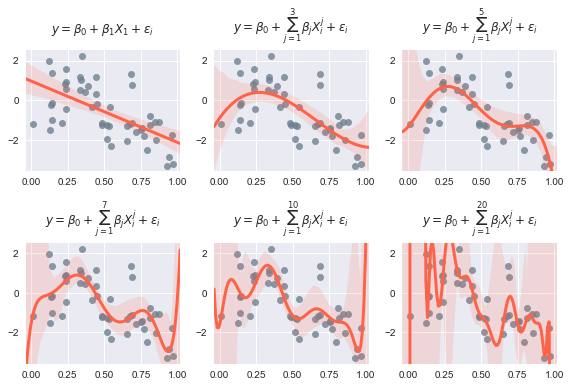

In [29]:
afx.polynomial_degrees()

#### Se implementara GAM, sobre una base de datos de inmuebles

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.drop(['zipcode','id','date'],axis=1,inplace=True)

In [8]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled['price']= np.log(df['price'])
df_scaled.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,12.309982,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715
1,13.195614,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868
2,12.100712,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375
3,13.311329,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522
4,13.142166,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849


In [9]:
X = df_scaled.iloc[:,1:]
N = X.shape[0]
X.insert(X.shape[1],'intercept',np.ones(N))
y = df_scaled['price']
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=.33,random_state= 63)

In [10]:
from pygam import LinearGAM

In [24]:
param_grids

{'lam': array([1.00000000e-03, 3.98107171e-03, 1.58489319e-02, 6.30957344e-02,
        2.51188643e-01, 1.00000000e+00, 3.98107171e+00, 1.58489319e+01,
        6.30957344e+01, 2.51188643e+02, 1.00000000e+03])}

In [19]:
param_grids = {'lam':np.logspace(-3,3,11)}

In [34]:
gam = LinearGAM(lam = np.logspace(-3,3,18))

In [35]:
gam.gridsearch(X_train,y_train)

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [31]:
gam = LinearGAM().gridsearch(X_train,y_train)

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [17]:
y_train

6912     13.693343
3972     12.834681
18295    12.959844
7136     12.310433
2976     12.971540
8521     13.244581
4953     12.535376
795      12.971424
10812    13.081541
18033    13.107250
14570    12.886641
21190    12.911642
16996    13.377006
15988    13.623139
4805     12.323745
8798     12.072541
1650     12.560069
20622    13.566254
21539    12.732279
16081    14.141211
7426     14.146970
14749    12.850555
19473    12.821258
11421    13.832368
2546     12.611204
4328     13.115846
6495     13.670485
20212    12.230765
12380    12.423198
15889    12.821258
           ...    
13982    13.304602
2168     12.751300
11981    13.795308
7814     12.581079
20916    13.171154
1020     13.641157
21262    13.233905
20777    12.441544
12167    12.206073
19246    12.994530
2163     13.253392
4313     12.971540
12512    12.324766
1770     14.669926
14933    13.113323
20120    12.994507
19128    12.958667
18970    13.265598
11022    13.055155
10028    12.873902
18118    13.151922
10866    13.

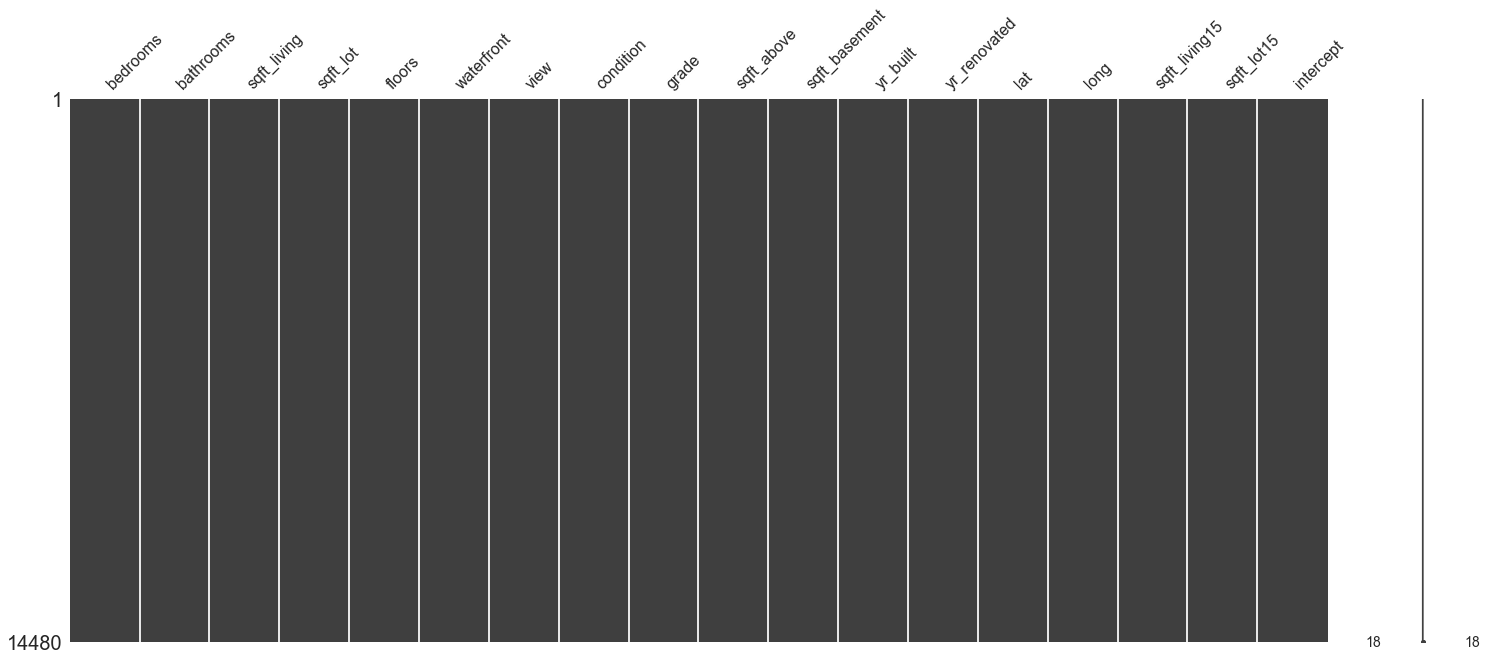